# Programming Assignment 3

In this assignment, you will implement k-means and hierarchical clustering. You can use any library functions to implement the tasks.

## The Wine Dataset

### Dataset Description:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are
1) Alcohol  
2) Malic acid  
3) Ash  
4) Alcalinity of ash   
5) Magnesium  
6) Total phenols  
7) Flavanoids  
8) Nonflavanoid phenols  
9) Proanthocyanins  
10)Color intensity  
11)Hue  
12)OD280/OD315 of diluted wines  
13)Proline   

The first five instances of the dataset are shown below:

In [3]:
import pandas as pd

data=pd.read_csv('wine.csv')
data.head(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


All columns except for the first one contain different features. The first column contains the class label (type of wine). DO NOT use data from the first column (i.e., the class labels) as feature.

## Task 1: k-means Clustering (50 points)

The basic K-means clustering works as follows:  

    1.Initialize ‘K’, number of clusters to be created.  
    2.Randomly assign K centroid points.  
    3.Assign each data point to its nearest centroid to create K clusters.  
    4.Re-calculate the centroids using the newly created clusters.  
    5.Repeat steps 3 and 4 until the centroid gets fixed.  

Apply k-means clustering on the wine dataset using euclidean distance as the distance metric and print the SSE (sum of squared errors) values for k = 2-8. (print the error values in %.2f format)

Example Output:  
For k = 2 After 15 iterations: Error =     
For k = 3 After 15 iterations: Error =   
For k = 4 After 15 iterations: Error =   
For k = 5 After 15 iterations: Error =   
For k = 6 After 15 iterations: Error =  
For k = 7 After 15 iterations: Error =   
For k = 8 After 15 iterations: Error =  

Display the SSE Error vs k plot and using elbow method, choose a good value for k.






For k = 2 After 15 iterations : Error = 4545746.29
For k = 3 After 15 iterations : Error = 2633555.33
For k = 4 After 15 iterations : Error = 1351749.37
For k = 5 After 15 iterations : Error = 916379.19
For k = 6 After 15 iterations : Error = 647326.00
For k = 7 After 15 iterations : Error = 560021.24
For k = 8 After 15 iterations : Error = 404412.01


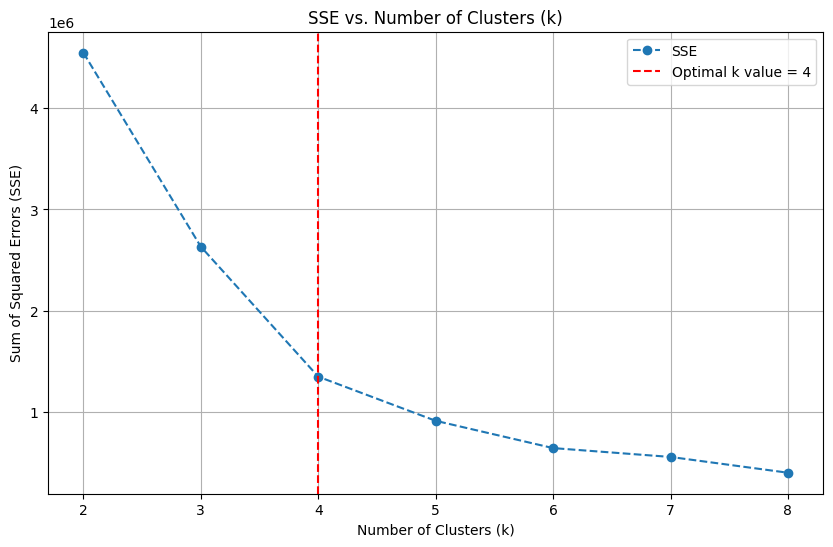

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the dataset manually
file_path = 'wine.csv'

# Read the CSV file and process it manually without pandas
data = []
with open(file_path, 'r') as file:
    # Skip the header row
    header = file.readline().strip().split(',')  # Read and ignore the header
    for line in file.readlines():
        # Split the line into columns, convert to float, and ignore the first column (class labels)
        row = list(map(float, line.strip().split(',')[1:]))
        data.append(row)

# Extract features as a list of lists
features = data

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)) ** 0.5

# Implement K-Means clustering from scratch
def kmeans_clustering(data, k, max_iterations=15):
    random.seed(42)  # For reproducibility

    # Randomly initialize k centroids from the data points
    centroids = random.sample(data, k)

    for iteration in range(max_iterations):
        # Assign each data point to the nearest centroid
        clusters = {i: [] for i in range(k)}
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = distances.index(min(distances))
            clusters[cluster_idx].append(point)

        # Recalculate centroids as the mean of the points in each cluster
        new_centroids = []
        for cluster_idx in range(k):
            if clusters[cluster_idx]:  # Avoid empty clusters
                cluster_points = clusters[cluster_idx]
                centroid = [sum(dim) / len(cluster_points) for dim in zip(*cluster_points)]
                new_centroids.append(centroid)
            else:
                new_centroids.append(centroids[cluster_idx])  # Keep the old centroid

        # Check for convergence
        if centroids == new_centroids:
            break
        centroids = new_centroids

    # Calculate SSE (Sum of Squared Errors)
    sse = 0
    for cluster_idx, cluster_points in clusters.items():
        for point in cluster_points:
            sse += euclidean_distance(point, centroids[cluster_idx]) ** 2

    return sse

# Calculate SSE for k = 2 to k = 8
sse_values = []
k_values = range(2, 9)
for k in k_values:
    sse = kmeans_clustering(features, k)
    sse_values.append(sse)
    print(f"For k = {k} After 15 iterations : Error = {sse:.2f}")

# Identify the optimal k (example: using the elbow method)
optimal_k = 4  # Set this manually based on visual inspection or additional logic

# Plot SSE vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse_values, marker='o', linestyle='--', label="SSE")
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"Optimal k value = {optimal_k}")
plt.title("SSE vs. Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()


**Using the "elbow method," we observe the point where the reduction in SSE slows down significantly, indicating a good trade-off between the number of clusters and the clustering performance. From the plot, the "elbow" is most prominent at k=4. Beyond this point, the decrease in SSE becomes less pronounced. Therefore, k=4 is a suitable choice for the number of clusters in this dataset.**

## Task 2: Agglomerative Hierarchical Clustering (50 points)

The basic agglomerative hierarchical clustering works as follows:

    1. Initialize the proximity matrix
    2. Let each data point be a cluster
    3. Repeat the following steps until there is only one cluster left:
        a. Find the two closest clusters in the cluster list and merge them into a single cluster
        b. Update the cluster distance matrix to reflect the new cluster's distances to the other clusters
        c. Remove the two clusters that were just merged and add the new single cluster to the cluster list.
    4. Return the final single cluster, which is the hierarchy of clusters.
    
a) Perform Single link hierarchical clustering on the wine dataset using euclidean distance as the distance metric. Show the dendrogram and calculate the silhouette coefficient for k = 3.

b) Perform Complete link hierarchical clustering on the wine dataset using euclidean distance as the distance metric. Show the dendrogram and calculate the silhouette coefficient for k = 3.

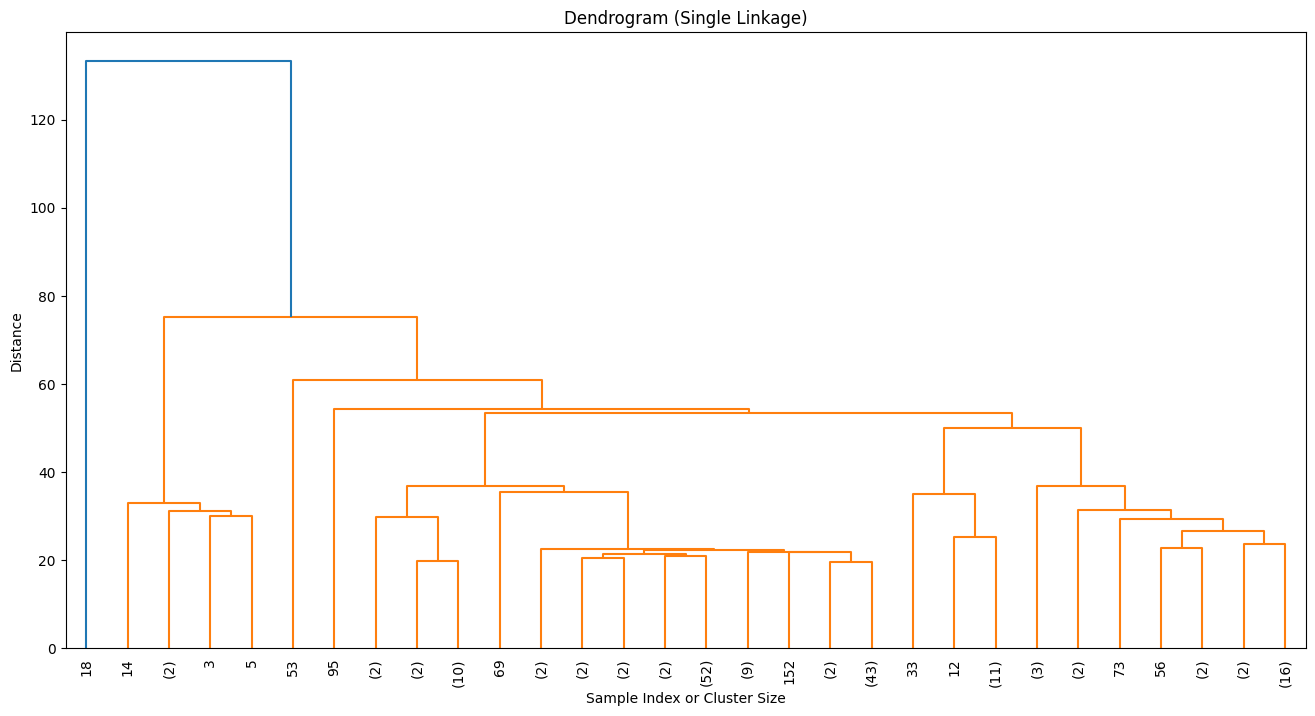


Silhouette Coefficient for Single Linkage (k=3): 0.49



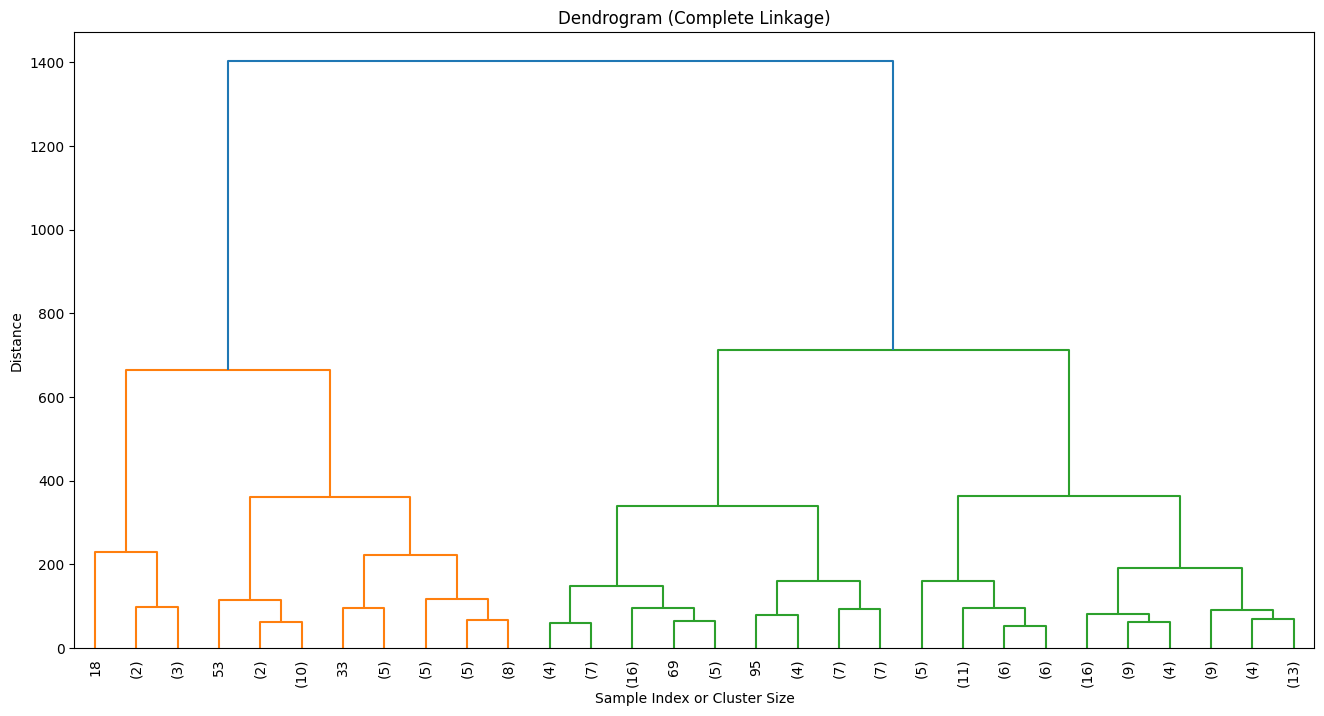


Silhouette Coefficient for Complete Linkage (k=3): 0.54



In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# Load dataset
file_path = 'wine.csv'  # Replace with your file path
data = []
with open(file_path, 'r') as file:
    lines = file.readlines()
    for line in lines[1:]:  # Skip the header row
        data.append([float(x) for x in line.strip().split(',')])

# Exclude the class label column
features = np.array([row[1:] for row in data])

# Function to form flat clusters manually
def form_flat_clusters(linkage_matrix, num_clusters):
    n = linkage_matrix.shape[0] + 1  # Number of original data points
    clusters = {i: [i] for i in range(n)}  # Each data point starts as its own cluster

    for i, (idx1, idx2, dist, _) in enumerate(linkage_matrix):
        idx1, idx2 = int(idx1), int(idx2)
        new_cluster = clusters[idx1] + clusters[idx2]  # Merge clusters
        clusters[n + i] = new_cluster
        del clusters[idx1], clusters[idx2]  # Remove old clusters

        # Stop merging when we have the desired number of clusters
        if len(clusters) == num_clusters:
            return list(clusters.values())

    return list(clusters.values())

# (a) Single Linkage Clustering
linkage_matrix_single = linkage(features, method='single', metric='euclidean')

# Plot dendrogram for Single Linkage
plt.figure(figsize=(16, 8))
dendrogram(
    linkage_matrix_single,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
)
plt.title("Dendrogram (Single Linkage)")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()

# Form flat clusters for k=3 manually
flat_clusters_single = form_flat_clusters(linkage_matrix_single, 3)
clusters_single = np.zeros(len(features), dtype=int)
for cluster_id, points in enumerate(flat_clusters_single):
    for point in points:
        clusters_single[point] = cluster_id + 1

# Calculate silhouette coefficient for Single Linkage
silhouette_single = silhouette_score(features, clusters_single)
print(f"\nSilhouette Coefficient for Single Linkage (k=3): {silhouette_single:.2f}\n")

# (b) Complete Linkage Clustering
linkage_matrix_complete = linkage(features, method='complete', metric='euclidean')

# Plot dendrogram for Complete Linkage
plt.figure(figsize=(16, 8))
dendrogram(
    linkage_matrix_complete,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
)
plt.title("Dendrogram (Complete Linkage)")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.show()

# Form flat clusters for k=3 manually
flat_clusters_complete = form_flat_clusters(linkage_matrix_complete, 3)
clusters_complete = np.zeros(len(features), dtype=int)
for cluster_id, points in enumerate(flat_clusters_complete):
    for point in points:
        clusters_complete[point] = cluster_id + 1

# Calculate silhouette coefficient for Complete Linkage
silhouette_complete = silhouette_score(features, clusters_complete)
print(f"\nSilhouette Coefficient for Complete Linkage (k=3): {silhouette_complete:.2f}\n")


### Submission Guidelines:
        
Submit through Canvas your source code in a single .ipynb file.   
The name of the .ipynb file should be YourStudentID.ipynb. (For example: 1001234567.ipynb)  
You don't need to attach the dataset with your submission.  